In [1]:
import   pandas  as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv(r"/Users/renchulaji/Desktop/Data Science/train.csv")

In [3]:
data.shape

(22750, 9)

In [4]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [5]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [7]:

# Drop Employee ID, DOJ
data = data.drop(['Employee ID', 'Date of Joining'], axis=1)


In [8]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

## Droping Duplicates if any

In [9]:
duplicated_rows = data.duplicated()
print(duplicated_rows.sum())

3005


In [10]:
data.drop_duplicates(inplace = True) 

In [11]:
data.shape

(19745, 7)

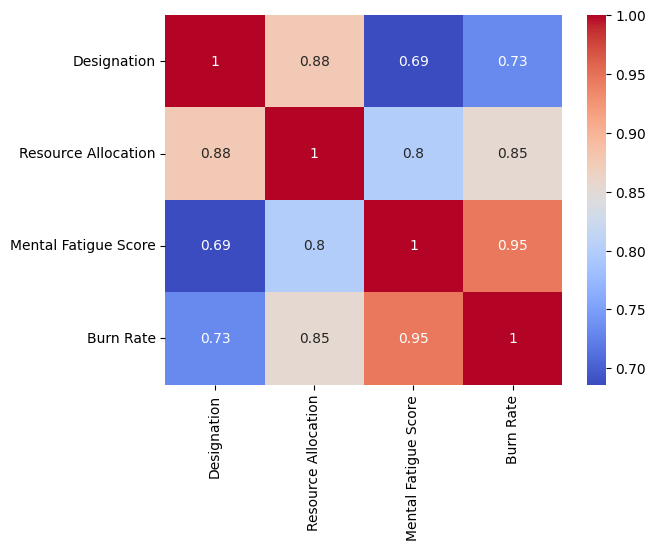

In [12]:
#using heatmap to check duplicates
num_df= data.select_dtypes(include="number")
num_df.corr()
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Handling Missing Values

In [13]:
data.isna().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1340
Mental Fatigue Score    1661
Burn Rate                973
dtype: int64

In [14]:
missing_info = data.isnull().sum().to_frame(name='Missing Count')
missing_info['% of Total'] = (missing_info['Missing Count'] / len(data)) * 100
print(missing_info)

                      Missing Count  % of Total
Gender                            0    0.000000
Company Type                      0    0.000000
WFH Setup Available               0    0.000000
Designation                       0    0.000000
Resource Allocation            1340    6.786528
Mental Fatigue Score           1661    8.412256
Burn Rate                       973    4.927830


In [15]:
#Drop rows where target (Burn Rate) is missing


before_drop = data.shape[0]
data = data.dropna(subset=['Burn Rate'])
after_drop = data.shape[0]
# Number of rows dropped
dropped = before_drop - after_drop

print(f"Rows before drop: {before_drop}")
print(f"Rows after drop: {after_drop}")
print(f"Rows dropped: {dropped}")

Rows before drop: 19745
Rows after drop: 18772
Rows dropped: 973


In [16]:
data.isna().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1242
Mental Fatigue Score    1558
Burn Rate                  0
dtype: int64

In [17]:
num_df= data.select_dtypes(include="number")
cat_df= data.select_dtypes(include="object")
print("Numerical Columns are")
num_cols=num_df.columns.tolist()
print(num_cols)
print("Categorical Columns are")
cat_cols=cat_df.columns.tolist()
print(cat_cols)


Numerical Columns are
['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']
Categorical Columns are
['Gender', 'Company Type', 'WFH Setup Available']


#Histogram

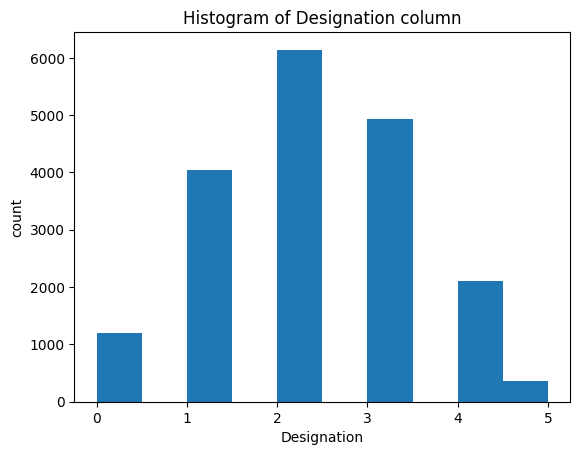

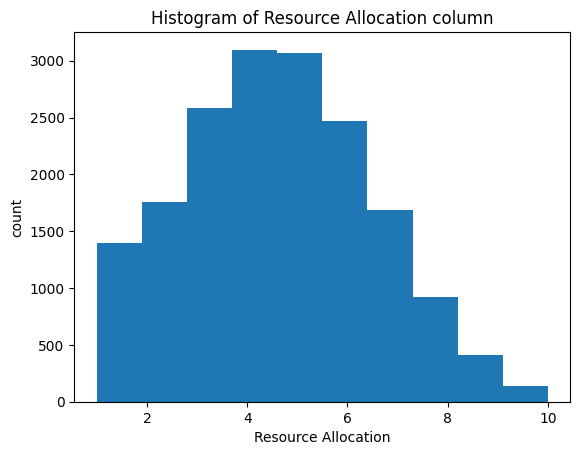

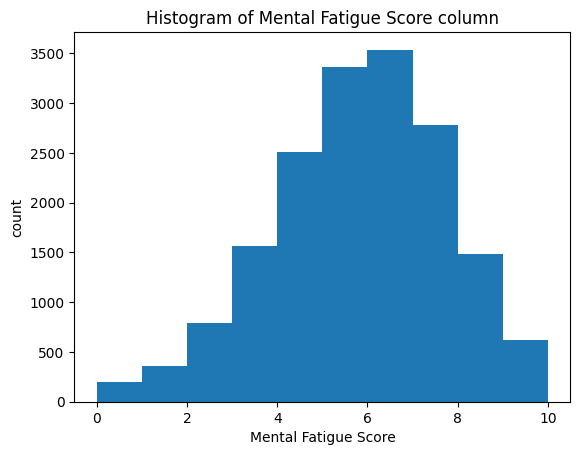

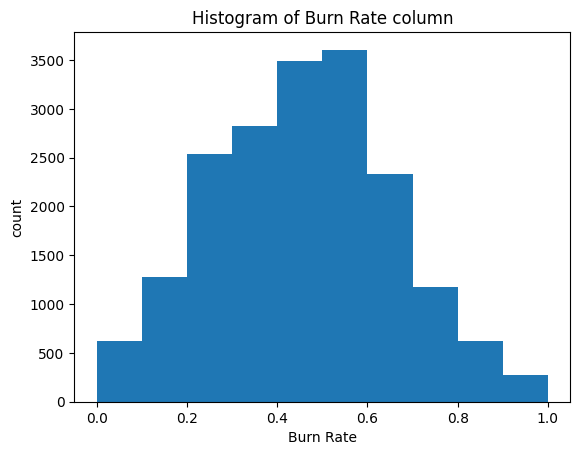

In [18]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [19]:
#filling for numerical columns

In [20]:

data['Resource Allocation'] = data['Resource Allocation'].fillna(data['Resource Allocation'].median())
data['Mental Fatigue Score'] = data['Mental Fatigue Score'].fillna(data['Mental Fatigue Score'].median())

num_df = data.select_dtypes(include=['float64', 'int64'])
print(num_df.isna().sum())

Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64


In [21]:
cat_df.isna().sum() #checking for categorical columns

Gender                 0
Company Type           0
WFH Setup Available    0
dtype: int64

In [22]:
#recombine numerical and categorical colmns
data=pd.concat([num_df,cat_df],axis=1)
data.isna().sum()

Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
Gender                  0
Company Type            0
WFH Setup Available     0
dtype: int64

In [23]:
data.shape

(18772, 7)

## Outlier

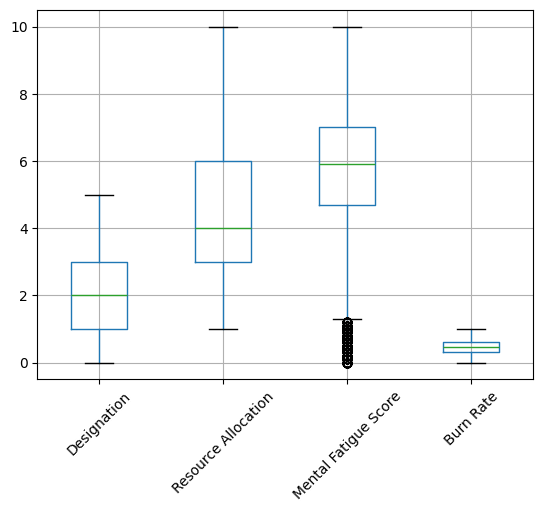

In [24]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [25]:
def remove_outliers_until_stable(df, column_name):
    while True:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_new = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
        if len(df_new) == len(df):
            break
        df = df_new
    return df

# Clean copy to work on
cleaned_data = data.copy()

# Apply to each numeric column
for col in cleaned_data.select_dtypes(include='number').columns:
    cleaned_data = remove_outliers_until_stable(cleaned_data, col)

# Reset index after row drops
# This assumes you have already defined `data` or `cleaned_data`
num_df = cleaned_data.select_dtypes(include='number')



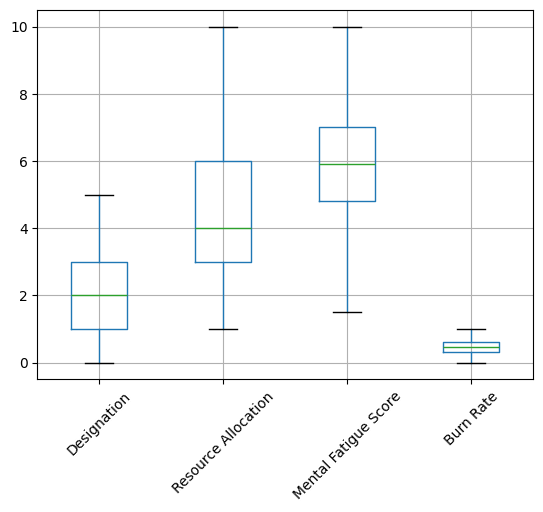

In [26]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [27]:
data['Burn Rate'].nunique()

101

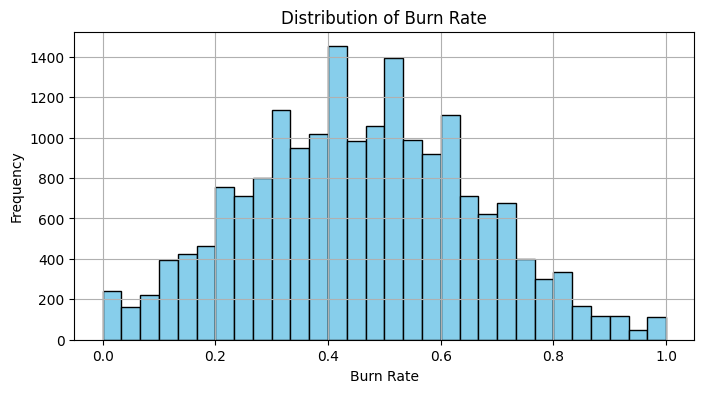

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
data['Burn Rate'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Burn Rate")
plt.xlabel("Burn Rate")
plt.ylabel("Frequency")
plt.show()


## Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
import joblib

df_label_encoded = data.copy()
cat_cols = ['Gender', 'Company Type', 'WFH Setup Available']

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    le.fit(df_label_encoded[col].unique().tolist())  # fit with all possible categories
    df_label_encoded[col] = le.transform(df_label_encoded[col])
    label_encoders[col] = le

# Save encoders
joblib.dump(label_encoders, "label_encoders.pkl")

# Then train your XGBoost model using df_label_encoded


['label_encoders.pkl']

## Standaridization

In [30]:
from sklearn.preprocessing import StandardScaler

# Make a copy
df_scaled = df_label_encoded.copy()

# Select numeric columns to scale (exclude target if needed)
num_cols = ['Designation', 'Resource Allocation', 'Burn Rate','Mental Fatigue Score']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected numeric columns
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# Preview the result
print(df_scaled[num_cols].head())


   Designation  Resource Allocation  Burn Rate  Mental Fatigue Score
0    -0.176273            -0.745597  -1.484704             -1.091162
1    -1.048901            -1.243457  -0.483540             -0.432812
2    -0.176273            -0.247737   0.167217              0.006088
3    -1.048901            -1.741317  -1.284471             -1.749512
4     0.696355             1.245844   0.317392              0.609575


## Feature Selection



In [31]:
X = df_label_encoded.drop('Burn Rate', axis=1)
y = df_label_encoded['Burn Rate']


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## LINEAR REGRESSION

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE):  {mae:.4f}")
print(f"Mean Squared Error (MSE):  {mse:.4f}")
print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
print(f"R² Score:  {r2:.4f}")


Mean Absolute Error (MAE):  0.0540
Mean Squared Error (MSE):  0.0051
Root Mean Squared Error (RMSE):  0.0711
R² Score:  0.8796


## Random Forest

In [35]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Predict on test set
y_pred = rf_model.predict(X_test)

# 4. Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 5. Display Results
print(f"Mean Absolute Error (MAE):  {mae:.4f}")
print(f"Mean Squared Error (MSE):  {mse:.4f}")
print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
print(f"R² Score:  {r2:.4f}")


Mean Absolute Error (MAE):  0.0527
Mean Squared Error (MSE):  0.0045
Root Mean Squared Error (RMSE):  0.0674
R² Score:  0.8921


## XG Boost

In [37]:
!pip install xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [38]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [39]:
categorical_cols = ['Gender', 'Company Type', 'WFH Setup Available']


In [40]:
encoders = {}

In [41]:
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

In [42]:
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [44]:
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# Identify categorical and numeric columns
categorical_cols = ["Gender", "Company Type", "WFH Setup Available"]
numeric_cols = ["Mental Fatigue Score", "Resource Allocation", "Designation"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor: OneHotEncoder for categorical, StandardScaler for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

# XGBoost model
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

# Create pipeline with preprocessing + model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb_model)
])

# Hyperparameter grid for GridSearch
params = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [3, 5]
}

# Grid search
grid_search = GridSearchCV(pipeline, params, cv=3, scoring="r2", verbose=1)
grid_search.fit(X_train, y_train)

# Best pipeline from GridSearch
best_pipeline = grid_search.best_estimator_

# Save the trained pipeline
joblib.dump(best_pipeline, "burnout_pipeline.pkl")
print("Pipeline saved as burnout_pipeline.pkl")

# Predictions using the best pipeline
y_pred = best_pipeline.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE):  {mae:.4f}")
print(f"Mean Squared Error (MSE):  {mse:.4f}")
print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
print(f"R² Score:  {r2:.4f}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Pipeline saved as burnout_pipeline.pkl
Mean Absolute Error (MAE):  0.0484
Mean Squared Error (MSE):  0.0038
Root Mean Squared Error (RMSE):  0.0617
R² Score:  0.9095


## Lasso Regression

In [45]:
from sklearn.linear_model import Lasso

# Initialize and train Lasso Regression
lasso_model = Lasso(alpha=0.01, random_state=42)  # You can tune alpha
lasso_model.fit(X_train, y_train)

# Predict
y_pred = lasso_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Results
print("Lasso Regression Results")
print(f"Mean Absolute Error (MAE):  {mae:.4f}")
print(f"Mean Squared Error (MSE):  {mse:.4f}")
print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
print(f"R² Score:  {r2:.4f}")


Lasso Regression Results
Mean Absolute Error (MAE):  0.0543
Mean Squared Error (MSE):  0.0052
Root Mean Squared Error (RMSE):  0.0720
R² Score:  0.8768


##  Ridge Regression

In [46]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Results")
print(f"Mean Absolute Error (MAE):  {mae:.4f}")
print(f"Mean Squared Error (MSE):  {mse:.4f}")
print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
print(f"R² Score:  {r2:.4f}")



Ridge Regression Results
Mean Absolute Error (MAE):  0.0540
Mean Squared Error (MSE):  0.0051
Root Mean Squared Error (RMSE):  0.0711
R² Score:  0.8796


## Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor()

param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'subsample': [1.0],
    'colsample_bytree': [1.0]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=1  # Safer option for low memory
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best R² Score: 0.9043105206958755


In [48]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [49]:
from sklearn.metrics import r2_score
y_pred = grid_search.best_estimator_.predict(X_test)
print("Test R² Score:", r2_score(y_test, y_pred))

Test R² Score: 0.9092931904301161


In [50]:
import pickle
import joblib
best_model = grid_search.best_estimator_
joblib.dump(best_model, "xgb_best_model.pkl")
print("Model saved as xgb_best_model.pkl")

Model saved as xgb_best_model.pkl
